# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['kathmandu', 'lorengau', 'bredasdorp', 'albany', 'bambous virieux', 'kawalu', 'rikitea', 'severo-kurilsk', 'pevek', 'hermanus', 'puerto escondido', 'port hardy', 'torbay', 'cherskiy', 'cape town', 'ancud', 'belushya guba', 'harper', 'saint-philippe', 'pacifica', 'san felipe', 'taolanaro', 'grand gaube', 'port alfred', 'te anau', 'impfondo', 'coos bay', 'bluff', 'prince rupert', 'novoselitskoye', 'hithadhoo', 'kapaa', 'karratha', 'arraial do cabo', 'domoni', 'umea', 'dreznica', 'ilulissat', 'busselton', 'mar del plata', 'veraval', 'korla', 'banjar', 'caravelas', 'kabanjahe', 'qaanaaq', 'bethel', 'dikson', 'vaini', 'iqaluit', 'port-cartier', 'kavieng', 'nyurba', 'kita', 'port moresby', 'hasaki', 'barrow', 'plouzane', 'vaitupu', 'port elizabeth', 'chokurdakh', 'sola', 'saint george', 'roald', 'punta arenas', 'ilebo', 'mataura', 'weston', 'conde', 'nikolskoye', 'new norfolk', 'atuona', 'sao filipe', 'ust-tsilma', 'ketchikan', 'mount gambier', 'ushuaia', 'hobart', 'hovd', 'puerto ayora', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Build query URL
query_url = f"{url}appid={weather_api_key}&q="


In [4]:
response = requests.get(query_url+'port elizabeth').json()
print(response)

{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 63.75, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1017, 'humidity': 100}, 'visibility': 9000, 'wind': {'speed': 1.12}, 'clouds': {'all': 0}, 'dt': 1587252772, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1587271402, 'sunset': 1587311386}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}


In [43]:
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_spd = []
num = 0
country = []

for city in cities:
    response = requests.get(query_url+city).json()
    num = num+1
    print(f"Processing city {num} {city}")
      

    try:
        lat.append(response['coord']['lat'])
    except (KeyError, IndexError):
        lat.append(None)
    try:
        lng.append(response['coord']['lon'])
    except (KeyError, IndexError):
        lng.append(None)
    try:
        temp.append(response['main']['temp'])
    except (KeyError, IndexError):
        temp.append(None)
    try:
        humidity.append(response['main']['humidity'])
    except (KeyError, IndexError):
        humidity.append(None)
    try:
        cloudiness.append(response['clouds']['all'])
    except (KeyError, IndexError):
        cloudiness.append(None)
    try:
        wind_spd.append(response['wind']['speed'])
    except (KeyError, IndexError): 
        wind_spd.append(None)
    try:
        country.append(response['sys']['country'])
    except (KeyError, IndexError): 
        country.append(None)
        
    


Processing city 1 straumen
Processing city 2 busselton
Processing city 3 sao filipe
Processing city 4 yulara
Processing city 5 tasiilaq
Processing city 6 the valley
Processing city 7 puerto ayora
Processing city 8 barrow
Processing city 9 albany
Processing city 10 georgetown
Processing city 11 zenzeli
Processing city 12 kargil
Processing city 13 cape town
Processing city 14 talnakh
Processing city 15 raga
Processing city 16 ewa beach
Processing city 17 srivardhan
Processing city 18 jamestown
Processing city 19 hermanus
Processing city 20 eureka
Processing city 21 longyearbyen
Processing city 22 necochea
Processing city 23 erenhot
Processing city 24 torbay
Processing city 25 mys shmidta
Processing city 26 ushuaia
Processing city 27 avarua
Processing city 28 key largo
Processing city 29 yellowknife
Processing city 30 pevek
Processing city 31 amderma
Processing city 32 adrar
Processing city 33 mataura
Processing city 34 san patricio
Processing city 35 havoysund
Processing city 36 kidal
Pr

Processing city 282 muros
Processing city 283 honiara
Processing city 284 bilma
Processing city 285 batemans bay
Processing city 286 coquimbo
Processing city 287 ossora
Processing city 288 gamba
Processing city 289 camacha
Processing city 290 guilin
Processing city 291 palmer
Processing city 292 el alto
Processing city 293 krivosheino
Processing city 294 mana
Processing city 295 leningradskiy
Processing city 296 cartagena
Processing city 297 palu
Processing city 298 moyo
Processing city 299 chhatarpur
Processing city 300 newport
Processing city 301 saleaula
Processing city 302 chapais
Processing city 303 karratha
Processing city 304 minervino murge
Processing city 305 hamilton
Processing city 306 novikovo
Processing city 307 uray
Processing city 308 namibe
Processing city 309 aswan
Processing city 310 sur
Processing city 311 attawapiskat
Processing city 312 caravelas
Processing city 313 broome
Processing city 314 charlottetown
Processing city 315 whitehorse
Processing city 316 warmbad


Processing city 564 misratah
Processing city 565 anadyr
Processing city 566 chifeng
Processing city 567 umm ruwabah
Processing city 568 ilhabela
Processing city 569 hihifo
Processing city 570 fuling
Processing city 571 tacuarembo
Processing city 572 ayagoz
Processing city 573 charagua
Processing city 574 asfi
Processing city 575 killybegs
Processing city 576 irmo
Processing city 577 rapid valley
Processing city 578 lajas
Processing city 579 gurskoye
Processing city 580 warrington
Processing city 581 khasan
Processing city 582 zholymbet
Processing city 583 paita
Processing city 584 manzhouli
Processing city 585 dawlatabad
Processing city 586 orange
Processing city 587 bilibino
Processing city 588 cerritos
Processing city 589 bemidji
Processing city 590 stornoway
Processing city 591 ostrovnoy
Processing city 592 khash
Processing city 593 giddalur
Processing city 594 nelson bay
Processing city 595 berlevag
Processing city 596 cristalina
Processing city 597 burkhala
Processing city 598 gri

In [44]:
len(lat)
len(wind_spd)

609

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
#convert list to data frame
cities_df = pd.DataFrame(cities)
cities_df.columns = ['city']
cities_df['lat'] = lat
cities_df['lng'] = lng
cities_df['temp'] = temp
cities_df['humidity'] = humidity
cities_df['cloudiness'] = cloudiness
cities_df['wind_spd'] = wind_spd
cities_df['country'] = country

#drop rows with NaN values
cities_df = cities_df.dropna()

#make sure there are still over 500 cities with data
len(cities_df)


559

In [46]:
#export to csv
cities_df.to_csv("../output_data/cities.csv")

In [47]:
cities_df.head()

,city,lat,lng,temp,humidity,cloudiness,wind_spd,country
0,straumen,63.87,11.30,35.60,93.0,83.0,1.74,NO
1,busselton,-33.65,115.33,59.22,97.0,95.0,22.03,AU
2,sao filipe,14.90,-24.50,71.13,72.0,28.0,19.19,CV
3,yulara,-25.24,130.99,69.80,37.0,22.0,9.17,AU
4,tasiilaq,65.61,-37.64,32.00,95.0,99.0,13.87,GL


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

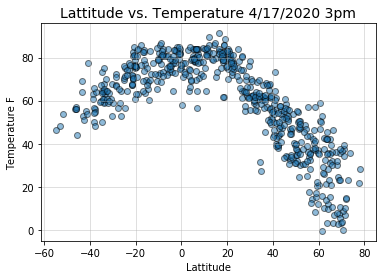

In [48]:
plt.scatter(cities_df['lat'], cities_df['temp'], alpha=.5, edgecolor="black")
plt.title("Lattitude vs. Temperature 4/17/2020 3pm", fontsize = 14)
plt.xlabel("Lattitude")
plt.ylabel("Temperature F")
plt.grid(alpha=.5)
plt.savefig(f'../output_data/Lat_v_temp.png')

This sactter plot shows how a cities lattitue may have an effect on its temperature. This shows how as the lattitude moves across the globe the temperature increases untill it reaches between 0 and 20 degrees lattitue and then decreases. This likely is due to the sun moving across through the day.

#### Latitude vs. Humidity Plot

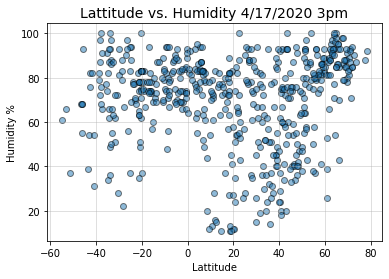

In [49]:
plt.scatter(cities_df['lat'], cities_df['humidity'], alpha=.5, edgecolor="black")
plt.title("Lattitude vs. Humidity 4/17/2020 3pm", fontsize = 14)
plt.xlabel("Lattitude")
plt.ylabel("Humidity %")
plt.grid(alpha=.5)
plt.savefig(f'../output_data/Lat_v_Humidity.png')

This graph shows humididty in cities by lattitue. There does not seem to be an easily decernable correlation between these two variables.

#### Latitude vs. Cloudiness Plot

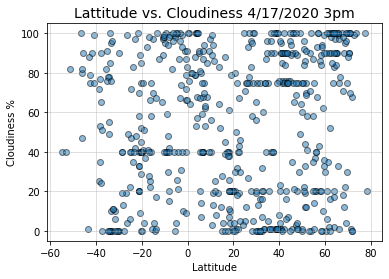

In [50]:
plt.scatter(cities_df['lat'], cities_df['cloudiness'], alpha=.5, edgecolor="black")
plt.title("Lattitude vs. Cloudiness 4/17/2020 3pm", fontsize = 14)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness %")
plt.grid(alpha=.5)
plt.savefig(f'../output_data/Lat_v_cloudiness.png')

This graph shows cloudiness in cities by lattitue. There does not seem to be an easily decernable correlation between these two variables but there are some liner patterns to the cloudiness likely related to the method of determination.

#### Latitude vs. Wind Speed Plot

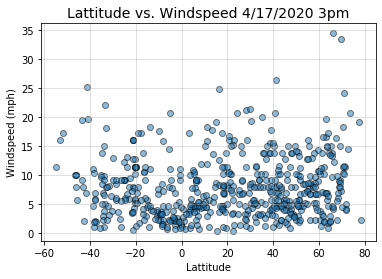

In [51]:
plt.scatter(cities_df['lat'], cities_df['wind_spd'], alpha=.5, edgecolor="black")
plt.title("Lattitude vs. Windspeed 4/17/2020 3pm", fontsize = 14)
plt.xlabel("Lattitude")
plt.ylabel("Windspeed (mph)")
plt.grid(alpha=.5)
plt.savefig(f'../output_data/Lat_v_wind_spd.png')

This graph shows windiness in cities by lattitue. There does not seem to be an easily decernable correlation between these two variables.

## Linear Regression

In [52]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg(x,y,t,x_lab, y_lab):
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
    vc_fit = vc_slope * x + vc_int
    regress_values = x * vc_slope + vc_int
    line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.grid(alpha=.5)
    plt.title(t, fontsize = 14)
    plt.scatter(x,y, alpha=.5, edgecolor="black")
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared value is: {vc_r}")
    #plt.annotate(line_eq, xy,fontsize=15,color="red")
    plt.savefig(f'../output_data/{t}.png')
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames
cities_north = cities_df.loc[(cities_df["lat"] > 0), ["city", "lat", "lng", "temp", "humidity", "cloudiness", "wind_spd"]]
cities_south = cities_df.loc[(cities_df["lat"] < 0), ["city", "lat", "lng", "temp", "humidity", "cloudiness", "wind_spd"]]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.8787853560595814


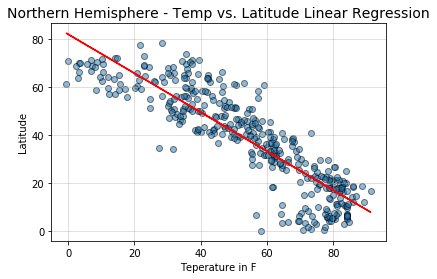

In [54]:
x= cities_north["temp"]
y= cities_north["lat"]
t = "Northern Hemisphere - Temp vs. Latitude Linear Regression"
x_lab = "Teperature in F"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7616706426397676


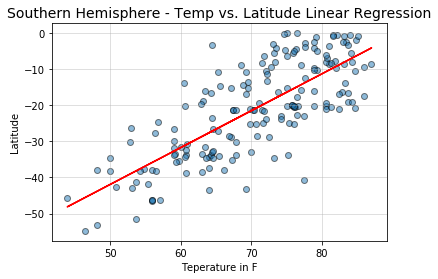

In [55]:
x= cities_south["temp"]
y= cities_south["lat"]
t = "Southern Hemisphere - Temp vs. Latitude Linear Regression"
x_lab = "Teperature in F"
y_lab = "Latitude"

reg(x,y,t,x_lab, y_lab)

The closer the lattitue is to 0 the higher the temperature generally is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.24935881822185935


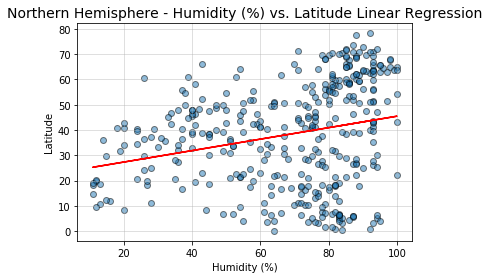

In [56]:
x= cities_north["humidity"]
y= cities_north["lat"]
t = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
x_lab = "Humidity (%)"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.21183947499060282


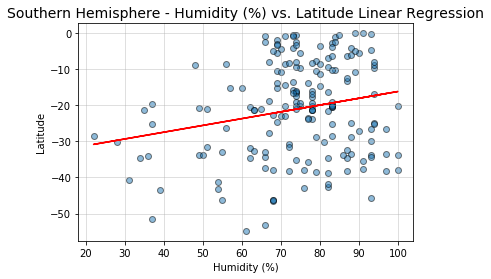

In [57]:
x= cities_south["humidity"]
y= cities_south["lat"]
t = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
x_lab = "Humidity (%)"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.10850244499510238


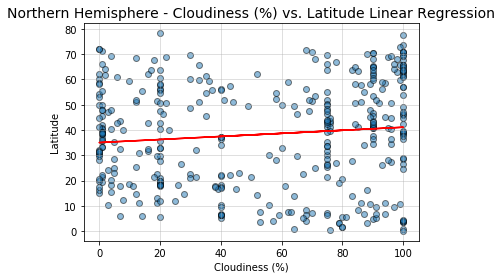

In [58]:
x= cities_north["cloudiness"]
y= cities_north["lat"]
t = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
x_lab = "Cloudiness (%)"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.12650701346332158


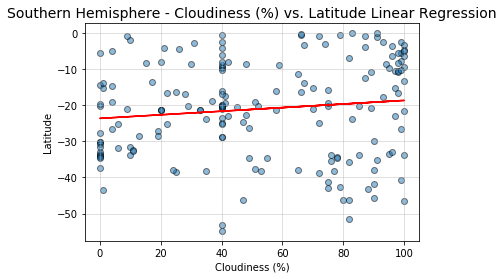

In [59]:
x= cities_south["cloudiness"]
y= cities_south["lat"]
t = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
x_lab = "Cloudiness (%)"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.15835389536803457


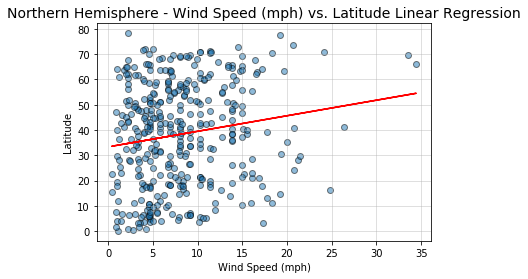

In [60]:
x= cities_north["wind_spd"]
y= cities_north["lat"]
t = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
x_lab = "Wind Speed (mph)"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.29216323361998836


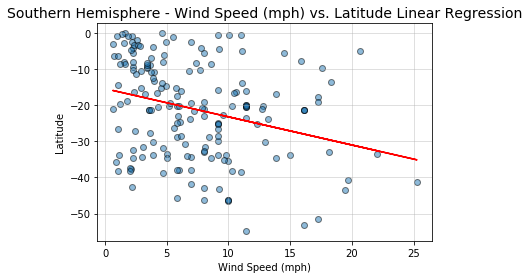

In [61]:
x= cities_south["wind_spd"]
y= cities_south["lat"]
t = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
x_lab = "Wind Speed (mph)"
y_lab = "Latitude"

reg(x,y,t,x_lab,y_lab)